# scmap for label transfer between our scRNAseq ref and snRNA from multiomics dualRNA-ATAC


In [50]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import warnings
import anndata
warnings.filterwarnings('ignore')


def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures_sn/scmap/'
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

scanpy==1.6.0 anndata==0.7.5 umap==0.4.6 numpy==1.19.4 scipy==1.5.3 pandas==1.1.4 scikit-learn==0.23.2 statsmodels==0.12.1 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


'/opt/conda/bin/python'

## Load data
### SC ref

In [51]:
sc_adataR = sc.read('/nfs/team292/lg18/with_valentina/FCA-M5-annotatedCluster4Seurat.h5ad')

In [52]:
# Add cluster name and doublet information
clu_annot = pd.read_csv('/nfs/team292/lg18/with_valentina/FCA-M5-annotatedCluster4Seurat.csv', header=0, index_col=0)
import collections 

if collections.Counter(sc_adataR.obs.index) == collections.Counter(clu_annot.index): 
    print ("The lists are identical") 
else : 
    print ("The lists are not identical") 
    
vars2import = ['clusters_manual','louvain', 'is_doublet', 'scrublet_cluster_score', 'scrublet_score']
for var in vars2import:
    sc_adataR.obs[var] = clu_annot[var]

The lists are identical


In [53]:
sc_adataR.obs['clusters'] = sc_adataR.obs['clusters_manual']
sc_adataR.obs['clusters'].value_counts(dropna = False)

Mesenchymal_GATA2_NR2F1    77319
Supporting_female          57451
Mesenchymal_LHX9_ARX       51992
Sertoli                    37796
lowQC                      20815
Coel Epi                   12001
Germ cells                 11388
Endothelial                10948
Epithelial                  9679
PV                          7440
Erythroid                   7423
Doublets                    5639
Immune                      5157
Neural                      2530
Metanephros                 1503
Name: clusters, dtype: int64

In [54]:
sc_adataR = sc_adataR[[ 'female' in i for i in sc_adataR.obs['sex'] ]]
sc_adataR = sc_adataR[[ i==14 for i in sc_adataR.obs['PCW'] ]]
sc_adataR = sc_adataR[[ 'Doublet' not in i for i in sc_adataR.obs['clusters'] ]]
sc_adataR = sc_adataR[[ 'Metanephros' not in i for i in sc_adataR.obs['clusters'] ]]
sc_adataR = sc_adataR[[ 'lowQC' not in i for i in sc_adataR.obs['clusters'] ]]

In [55]:
supporting = pd.read_csv('/nfs/team292/lg18/with_valentina/supporting_nocycling_annotation.csv', index_col = 0)
print(supporting['annotated_clusters'].value_counts())
supporting = supporting[supporting['annotated_clusters'].isin(['sLGR5',  'sKITLG', 'coelEpi', 'sPAX8b', 'sPAX8m', 'preGC_I_OSR1',
                                                        'ovarianSurf', 'preGC_II', 'preGC_II_hypoxia', 'preGC_III', 'preGC_III_Notch'])]
print(supporting['annotated_clusters'].value_counts())

Sertoli             19227
preGC_I_OSR1        11714
Sertoli_low          8763
preGC_II_hypoxia     8180
preGC_III            7871
preGC_II             6669
ovarianSurf          5148
coelEpi              4385
sLGR5                2660
preGC_III_Notch      2409
sPAX8b               1783
sPAX8m               1645
sKITLG               1245
Sertoli_WFDC2        1074
FetalLeydig-like      460
Name: annotated_clusters, dtype: int64
preGC_I_OSR1        11714
preGC_II_hypoxia     8180
preGC_III            7871
preGC_II             6669
ovarianSurf          5148
coelEpi              4385
sLGR5                2660
preGC_III_Notch      2409
sPAX8b               1783
sPAX8m               1645
sKITLG               1245
Name: annotated_clusters, dtype: int64


In [56]:
stromal = pd.read_csv('/nfs/team292/lg18/with_valentina/mesenchymal_annotated.csv', index_col = 0)
print(stromal['annotated_clusters'].value_counts())
# stromal = stromal.replace({'annotated_clusters': ['M_HOXC6', 'M_SFRP2', 'M_cycling', 'MullDuctFib_LGR5', 'M_ALDH1A2', 'M_CRABP1_BMP4', 'M_ISL1_BMP4', 'M_CD24']}, 'M_mesonephros')
stromal = stromal[stromal['annotated_clusters'].isin(['M_MGP', 'M_ALX1', 'M_prog_ISL1', 'M_MullDuct_LGR5',    'Gi',  'Oi'])]
print(stromal['annotated_clusters'].value_counts())

M_MGP               26162
Ti                  24745
M_cycling           16376
Gi                  14846
Oi                  11900
M_MullDuct_LGR5      6811
M_prog_ISL1          5021
M_ALX1               4625
M_MullDuct_AMHR2     3318
FetalLeydig          2368
Name: annotated_clusters, dtype: int64
M_MGP              26162
Gi                 14846
Oi                 11900
M_MullDuct_LGR5     6811
M_prog_ISL1         5021
M_ALX1              4625
Name: annotated_clusters, dtype: int64


In [57]:
germcells = pd.read_csv('/nfs/team292/lg18/with_valentina/germcells_annotation.csv', index_col = 0)
print(germcells['annotated_clusters'].value_counts())
germcells = germcells[germcells['annotated_clusters'].isin(['PGC', 'oogonia_meiosis', 'oogonia_STRA8', 'oocyte'])]
print(stromal['annotated_clusters'].value_counts())

PGC                  2011
oogonia_meiosis      1852
oogonia_STRA8        1672
oocyte                919
PGC_mitotic           869
GC_mitotic            793
pre-spermatogonia     753
Name: annotated_clusters, dtype: int64
M_MGP              26162
Gi                 14846
Oi                 11900
M_MullDuct_LGR5     6811
M_prog_ISL1         5021
M_ALX1              4625
Name: annotated_clusters, dtype: int64


In [58]:
supporting_germ = supporting.append(germcells)
supporting_germ = supporting_germ.append(stromal)
mapping_dict = supporting_germ['annotated_clusters'].to_dict()
sc_adataR.obs['annotated_clusters'] = sc_adataR.obs_names.map(mapping_dict)
sc_adataR.obs['annotated_clusters'].value_counts(dropna = False)

Trying to set attribute `.obs` of view, copying.


NaN                 3091
M_MGP               1483
Oi                   702
Gi                   448
M_MullDuct_LGR5      424
preGC_III            374
preGC_II             344
ovarianSurf          258
preGC_I_OSR1         217
preGC_II_hypoxia     164
coelEpi              150
oogonia_meiosis      102
preGC_III_Notch       97
PGC                   61
oogonia_STRA8         38
oocyte                26
M_ALX1                20
M_prog_ISL1           19
sPAX8b                17
sPAX8m                 4
sKITLG                 1
Name: annotated_clusters, dtype: int64

In [59]:
# Replace NaN with big clusters 
sc_adataR.obs['annotated_clusters'] = sc_adataR.obs['annotated_clusters'].fillna(sc_adataR.obs['clusters'])

# Remove 
sc_adataR = sc_adataR[[i not in ['Supporting_female', 'Mesenchymal_GATA2_NR2F1', 'Sertoli', 'Mesenchymal_LHX9_ARX', 'Coel Epi', 'Germ cells', 'Stromal', 'lowQC'] for i in sc_adataR.obs['annotated_clusters']]]
sc_adataR.shape
sc_adataR.obs['annotated_clusters'].value_counts(dropna = False)

M_MGP               1483
Oi                   702
Gi                   448
Erythroid            442
Endothelial          429
M_MullDuct_LGR5      424
preGC_III            374
preGC_II             344
Epithelial           303
ovarianSurf          258
PV                   222
preGC_I_OSR1         217
preGC_II_hypoxia     164
coelEpi              150
oogonia_meiosis      102
preGC_III_Notch       97
Immune                93
PGC                   61
oogonia_STRA8         38
Neural                30
oocyte                26
M_ALX1                20
M_prog_ISL1           19
sPAX8b                17
sPAX8m                 4
sKITLG                 1
Name: annotated_clusters, dtype: int64

### SN 

In [60]:
sn_adataR = sc.read('/nfs/team292/lg18/with_valentina/gonadsV1_freezed/dual_snRNAsnATAC_female_Hrv39.h5ad')
sn_adataR = sn_adataR[[i not in ['1'] for i in sn_adataR.obs['leiden']]]
sn_adata = anndata.AnnData(X=sn_adataR.raw.X, var=sn_adataR.raw.var, obs=sn_adataR.obs, asview=False)

## Intersect genes

In [61]:
sc_genes = sc_adataR.var_names.to_list()
sn_genes = sn_adata.var_names.to_list()

common_genes = list(set(sc_adataR.var.index.values).intersection(sn_adata.var.index.values))
print('common genes: ', len(common_genes))
sn_adata = sn_adata[:,common_genes]
sc_adataR = sc_adataR[:,common_genes]
print(sn_adata.X.shape)
print(sc_adataR.X.shape)

common genes:  24378
(3735, 24378)
(6468, 24378)


## R2PY setup


In [62]:
import rpy2.rinterface_lib.callbacks
import logging

In [63]:
# Ignore R warning messages
#Note: this can be commented out to get more verbose R output
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

In [64]:
import anndata2ri
anndata2ri.activate()

In [65]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## scmap

In [66]:
%%R
library(Matrix)
library(scmap)

In [67]:
%%R -i sc_adataR
sc_adataR

class: SingleCellExperiment 
dim: 24378 6468 
metadata(0):
assays(1): X
rownames(24378): DISC1 F11-AS1 ... HLA-DPB1 MGAM
rowData names(160): gene_ids.0 feature_types.0 ... n_cells.52 n_cells
colnames(6468): FCA_GND8715408_AAACCTGCATGGTAGG
  FCA_GND8715408_AAACCTGGTCAAAGCG ... HD_F_GON9479969_TTTGTCAGTCTCTCTG
  HD_F_GON9479969_TTTGTCAGTTCCGTCT
colData names(23): X5v1.1 TP ... clusters_manual annotated_clusters
reducedDimNames(0):
altExpNames(0):


In [68]:
%%R -i sn_adata
rowData(sn_adata)$feature_symbol <- rownames(sn_adata)
sn_adata

class: SingleCellExperiment 
dim: 24378 3735 
metadata(0):
assays(1): X
rownames(24378): DISC1 F11-AS1 ... HLA-DPB1 MGAM
rowData names(14): gene_ids.0 feature_types.0 ... n_cells
  feature_symbol
colnames(3735): HD_F_GON9525421_AAACAGCCAACAACAA
  HD_F_GON9525421_AAACCAACACCTACTT ... HD_F_GON9525422_TTTGTGGCATAATGAG
  HD_F_GON9525422_TTTGTGTTCATGCATA
colData names(16): n_genes sample ... clusters leiden_R
reducedDimNames(0):
altExpNames(0):


In [69]:
%%R 

counts <- assay(sc_adataR, "X")
libsizes <- colSums(counts)
size.factors <- libsizes/mean(libsizes)
logcounts(sc_adataR) <- log2(t(t(counts)/size.factors) + 1)
assayNames(sc_adataR)

[1] "X"         "logcounts"



FALSE  TRUE 
23978   400 


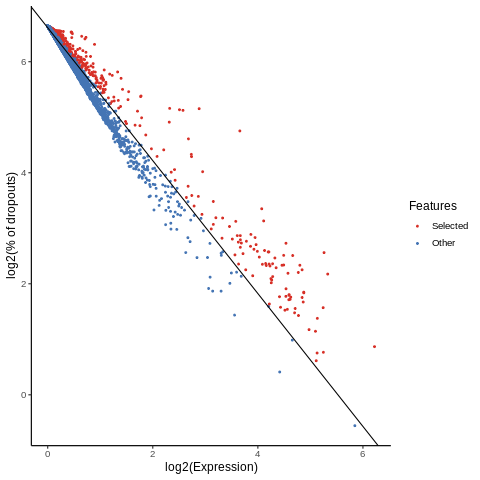

In [70]:
%%R

rowData(sc_adataR)$feature_symbol <- rownames(sc_adataR)
logcounts(sc_adataR) <- as.matrix(logcounts(sc_adataR))
sc_adataR <- selectFeatures(sc_adataR, n_features = 400, suppress_plot = FALSE)
print(table(rowData(sc_adataR)$scmap_features))

                 PV preGC_II Erythroid preGC_II_hypoxia ovarianSurf    M_MGP
A2M        1.168404 0.000000  0.000000        0.0000000    0.000000 0.000000
AC104389.5 0.000000 0.000000  3.529027        0.0000000    0.000000 0.000000
ACTA2      3.911867 0.000000  0.000000        0.0000000    0.000000 0.000000
ACTG1      5.097864 4.519449  0.000000        4.6214026    5.050532 5.487404
ADIPOR1    0.000000 0.000000  4.165428        0.2136222    0.000000 0.000000
AHSP       0.000000 0.000000  6.717721        0.0000000    0.000000 0.000000
            coelEpi Epithelial       Gi preGC_III M_MullDuct_LGR5 preGC_I_OSR1
A2M        0.000000   0.000000 0.000000  0.000000        0.000000     0.000000
AC104389.5 0.000000   0.000000 0.000000  0.000000        0.000000     0.000000
ACTA2      0.000000   0.000000 0.000000  0.000000        0.000000     0.000000
ACTG1      5.157572   4.907999 4.972687  4.266469        5.192961     4.247373
ADIPOR1    0.000000   0.000000 0.000000  0.000000        0.000000 

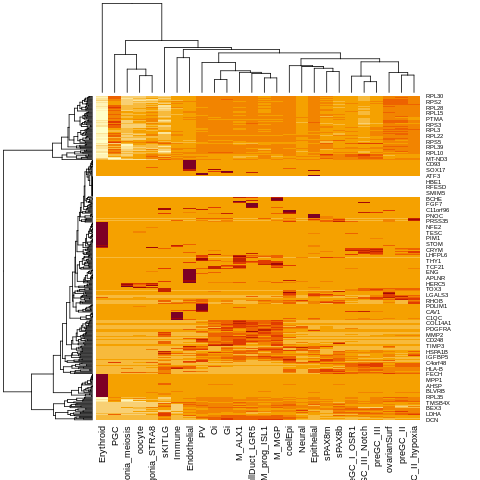

In [71]:
%%R 

sc_adataR <- indexCluster(sc_adataR, cluster_col = "annotated_clusters")
print(head(metadata(sc_adataR)$scmap_cluster_index))
heatmap(as.matrix(metadata(sc_adataR)$scmap_cluster_index))

In [72]:
%%R 

counts <- assay(sn_adata, "X")
libsizes <- colSums(counts)
size.factors <- libsizes/mean(libsizes)
logcounts(sn_adata) <- log2(t(t(counts)/size.factors) + 1)
logcounts(sn_adata) <- as.matrix(logcounts(sn_adata))
assayNames(sn_adata)

[1] "X"         "logcounts"


In [73]:
%%R -o scmapCluster_results

scmapCluster_results <- scmapCluster(
  projection = sn_adata,  threshold = 0.5,
  index_list = list(
    sc_adataR = metadata(sc_adataR)$scmap_cluster_index
  )
)

In [74]:
%%R 

print(head(scmapCluster_results$scmap_cluster_labs))
print(head(scmapCluster_results$scmap_cluster_siml))
print(head(scmapCluster_results$combined_labs))

     sc_adataR        
[1,] "M_MullDuct_LGR5"
[2,] "Epithelial"     
[3,] "PGC"            
[4,] "M_MullDuct_LGR5"
[5,] "unassigned"     
[6,] "M_MullDuct_LGR5"
     sc_adataR
[1,] 0.5133602
[2,] 0.7940871
[3,] 0.7014808
[4,] 0.5383228
[5,] 0.4620278
[6,] 0.6755565
[1] "M_MullDuct_LGR5" "Epithelial"      "PGC"             "M_MullDuct_LGR5"
[5] "unassigned"      "M_MullDuct_LGR5"


In [75]:
scmapCluster_results

scmap_cluster_labs,[RTYPES.STRSXP]
scmap_cluster_siml,[RTYPES.REALSXP]
combined_labs,[RTYPES.STRSXP]


In [76]:
labels = list(scmapCluster_results[0])
sn_adataR.obs['scmap_labels'] = labels
sn_adataR.obs['scmap_labels'].value_counts(dropna = False)

Trying to set attribute `.obs` of view, copying.


M_MullDuct_LGR5     1519
unassigned           627
M_ALX1               397
preGC_II             324
M_MGP                285
PGC                   86
preGC_II_hypoxia      73
Endothelial           70
ovarianSurf           70
Epithelial            55
Oi                    51
Neural                32
Gi                    31
preGC_III             23
oogonia_STRA8         22
Immune                21
M_prog_ISL1           11
sKITLG                10
sPAX8b                 7
preGC_III_Notch        7
PV                     6
preGC_I_OSR1           4
Erythroid              2
oogonia_meiosis        2
Name: scmap_labels, dtype: int64

In [77]:
similarities = scmapCluster_results[1]
similarities = [val for sublist in similarities for val in sublist]
#similarities
sn_adataR.obs['scmap_similarities'] = similarities

In [78]:
sn_adataR.obs[['scmap_labels', 'scmap_similarities']].to_csv('/nfs/team292/lg18/with_valentina/dual_snRNAsnATAC_female_Hrv39_scmap_predictions_highRes.csv')

... storing 'scmap_labels' as categorical


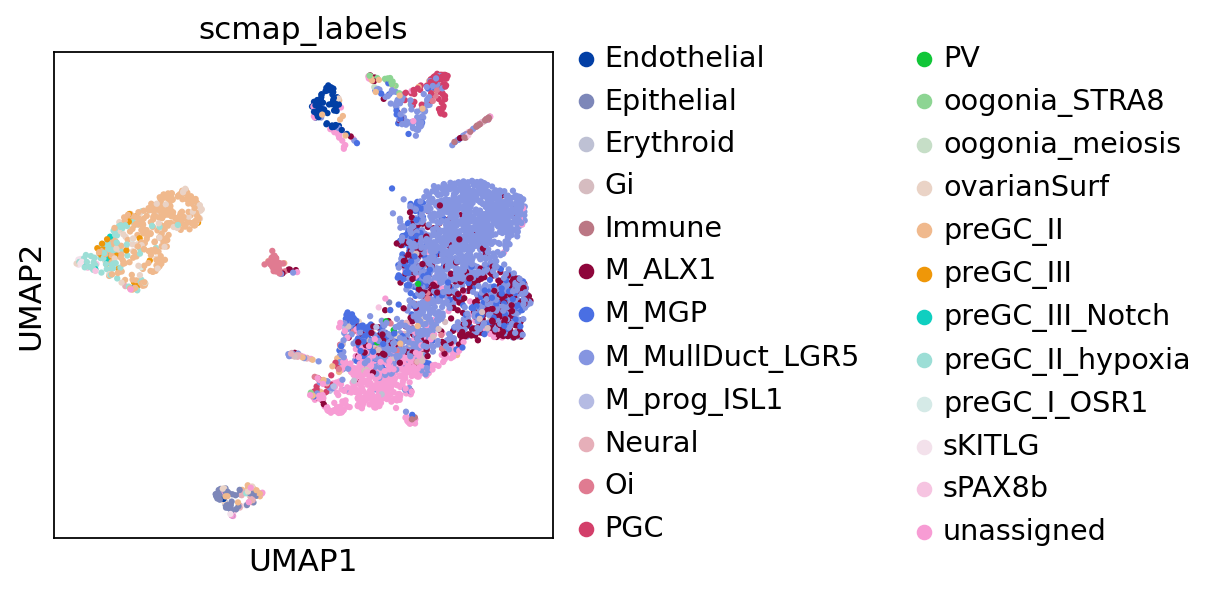

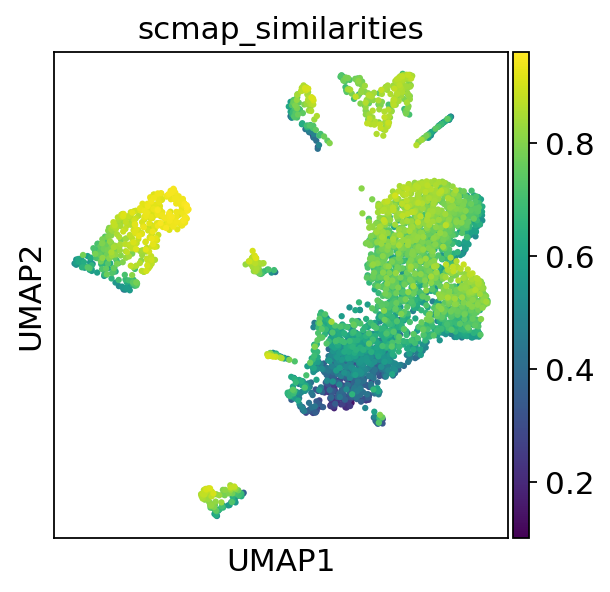

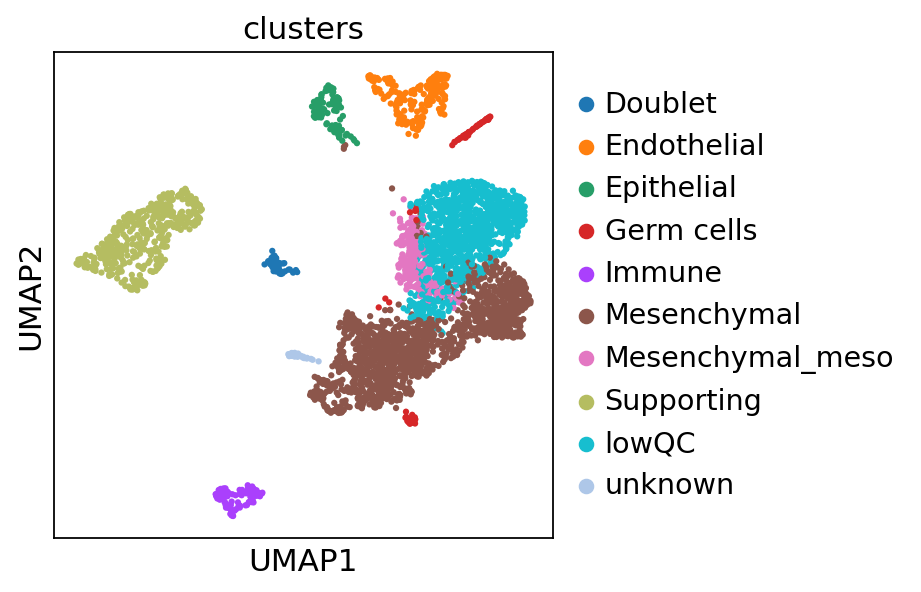

In [79]:
sc.pl.umap(sn_adataR, color='scmap_labels')
sc.pl.umap(sn_adataR, color='scmap_similarities')
sc.pl.umap(sn_adataR, color='clusters')